In [223]:
#libraries
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_point, geom_smooth, geom_line, geom_abline
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import plot_tree


In [224]:
#data
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

haOvR = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

haOvO = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")




Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [225]:
#column transformer
ct = ColumnTransformer(
  [
    ("dummify", 
    #handle_unknown: ignore observations for unknown values in category variable
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [226]:
#knn
knn_pipeline = Pipeline([
    ("preprocessing", ct),
    ("knn_classifier", KNeighborsClassifier(n_neighbors=7))
]).set_output(transform = "pandas")

In [227]:
#decision tree pipeline
decision_tree_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree_classifier", DecisionTreeClassifier())
]).set_output(transform = "pandas")

In [228]:
#LDA
lr_pipeline_linear_disc = Pipeline(
  [("preprocessing", ct),
  ("linear_disc_regression", LinearDiscriminantAnalysis())]
).set_output(transform="pandas")

In [229]:
#variable selection
X = ha.drop(["cp"], axis = 1)
y = ha["cp"]

In [230]:
#use roc_ovr for testing model accuracy

[Text(0.6979166666666666, 0.9444444444444444, 'x[5] <= 1.344\ngini = 0.234\nsamples = 148\nvalue = [128, 20]'),
 Text(0.4513888888888889, 0.8333333333333334, 'x[6] <= 0.392\ngini = 0.186\nsamples = 135\nvalue = [121, 14]'),
 Text(0.2222222222222222, 0.7222222222222222, 'x[2] <= 1.212\ngini = 0.098\nsamples = 97\nvalue = [92, 5]'),
 Text(0.08333333333333333, 0.6111111111111112, 'x[4] <= 0.063\ngini = 0.068\nsamples = 85\nvalue = [82, 3]'),
 Text(0.05555555555555555, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(0.1111111111111111, 0.5, 'x[5] <= -0.48\ngini = 0.145\nsamples = 38\nvalue = [35, 3]'),
 Text(0.08333333333333333, 0.3888888888888889, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.1388888888888889, 0.3888888888888889, 'x[2] <= -0.025\ngini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.08333333333333333, 0.2777777777777778, 'x[5] <= -0.351\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.05555555555555555, 0.16666666666666666, 'x[0] <= -0.688\ngini =

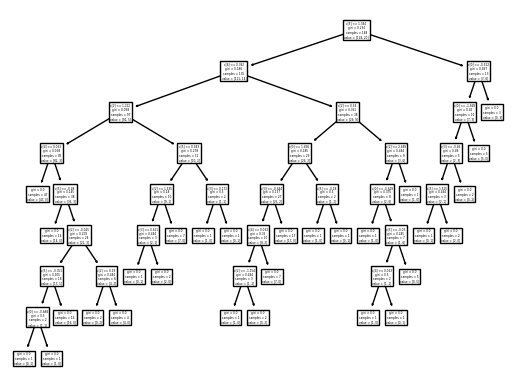

In [240]:
#fit tree
decision_tree_pipeline.fit(X,y)

tree = decision_tree_pipeline.named_steps['decision_tree_classifier']

plot_tree(tree)

Even when I made the tree legible, it wasn't really interpretable

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [206]:
#create new column
haOvR['cp_is_0'] = haOvR['cp'] == 0
haOvR['cp_is_1'] = haOvR['cp'] == 1
haOvR['cp_is_2'] = haOvR['cp'] == 2
haOvR['cp_is_3'] = haOvR['cp'] == 3

#turn cp_is_3 col to 1s and 0s
haOvR['cp_is_0'] = haOvR['cp_is_0'] * 1
haOvR['cp_is_1'] = haOvR['cp_is_1'] * 1
haOvR['cp_is_2'] = haOvR['cp_is_2'] * 1
haOvR['cp_is_3'] = haOvR['cp_is_3'] * 1

In [232]:
#logistic pipeline
lr_pipeline_logistic = Pipeline(
  [("preprocessing", ct),
  ("logistic_regression", LogisticRegression())]
).set_output(transform="pandas")

In [233]:
#variable selection, cp = 0
X = haOvR.drop(["cp_is_0", "cp_is_1", "cp_is_2", "cp_is_3", "cp"], axis = 1)
y = haOvR["cp_is_0"]

#fit pipeline
#lr_pipeline_logistic.fit(X,y)

scores = cross_val_score(lr_pipeline_logistic, X, y, cv=5, scoring='f1')
f1 = scores.mean()
f1

KeyError: "['cp_is_0', 'cp_is_1', 'cp_is_2', 'cp_is_3'] not found in axis"

In [ ]:
#variable selection, cp = 1
X = haOvR.drop(["cp_is_0", "cp_is_1", "cp_is_2", "cp_is_3", "cp"], axis = 1)
y = haOvR["cp_is_1"]

#fit pipeline
#lr_pipeline_logistic.fit(X,y)

scores = cross_val_score(lr_pipeline_logistic, X, y, cv=5, scoring='f1')
f1 = scores.mean()
f1

In [234]:
#variable selection, cp = 2
X = haOvR.drop(["cp_is_0", "cp_is_1", "cp_is_2", "cp_is_3", "cp"], axis = 1)
y = haOvR["cp_is_2"]

#fit pipeline
#lr_pipeline_logistic.fit(X,y)

scores = cross_val_score(lr_pipeline_logistic, X, y, cv=5, scoring='f1')
f1 = scores.mean()
f1

KeyError: "['cp_is_0', 'cp_is_1', 'cp_is_2', 'cp_is_3'] not found in axis"

In [ ]:
#variable selection, cp = 3
X = haOvR.drop(["cp_is_0", "cp_is_1", "cp_is_2", "cp_is_3", "cp"], axis = 1)
y = haOvR["cp_is_3"]

#fit pipeline
#lr_pipeline_logistic.fit(X,y)

scores = cross_val_score(lr_pipeline_logistic, X, y, cv=5, scoring='f1')
f1 = scores.mean()
f1

The best distinguised category was cp_is_0. This makes sense because it is saying that there is NO chest pain while the others are different levels of chest pain

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [235]:
#just for 0's compare 0 to 1, 0 to 2, and 0 to 3
cp_0_1 = haOvO[(haOvO['cp'] == 0) | (haOvO['cp'] == 1)]

cp_0_2 = haOvO[(haOvO['cp'] == 0) | (haOvO['cp'] == 2)]

cp_0_3 = haOvO[(haOvO['cp'] == 0) | (haOvO['cp'] == 3)]

cp_0_4 = haOvO[(haOvO['cp'] == 0) | (haOvO['cp'] == 4)]

In [236]:
#variable selection, cp = 0 and 1
X = cp_0_1.drop(["cp"], axis = 1)
y = cp_0_1["cp"]

scores = cross_val_score(lr_pipeline_logistic, X, y, cv=5, scoring='roc_auc')
roc = scores.mean()
roc

0.8376709401709401

In [237]:
#variable selection, cp = 0 and 2
X = cp_0_2.drop(["cp"], axis = 1)
y = cp_0_2["cp"]

scores = cross_val_score(lr_pipeline_logistic, X, y, cv=5, scoring='roc_auc')
roc = scores.mean()
roc

0.7511029411764706

In [238]:
#variable selection, cp = 0 and 3
X = cp_0_3.drop(["cp"], axis = 1)
y = cp_0_3["cp"]

scores = cross_val_score(lr_pipeline_logistic, X, y, cv=5, scoring='roc_auc')
roc = scores.mean()
roc

0.7412307692307692

The best pair using roc_auc scores was the 0 and 1 pair

In [239]:
#use roc_auc for binary variable as response

#micro - metric of the one category that is most important to us and then measure

#macro - average of all the micro versions